http://nesstar.ess.nsd.uib.no/webview/index.jsp?v=2&submode=abstract&study=http%3A%2F%2F129.177.90.83%3A80%2Fobj%2FfStudy%2FESS6e02.4&mode=documentation&top=yes

https://docs.google.com/presentation/d/1Jr7YXWWu4Wkegx8jBnV6W8j-BTzg1Oypp5b4V0teP3E/edit#slide=id.gbf4aeacc9e_12_5

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

## Importings

In [80]:
DATASET_PATH = os.path.join('datasets', 'ess6e02_4.sas7bdat')
df = pd.read_sas(DATASET_PATH, encoding = 'latin-1')
print(df.shape)


(54673, 624)


## Dataprep

### Filter columns

In [81]:
target_well_being_cols = ["happy", "stflife", 'sedirlf', 'enjlf', 'fltanx']

cols = ['cntry', 'sclmeet', 'inprdsc', 'aesfdrk', 'health', 'hlthhmp', 'sclact', 'crmvct',
        'fltsd', 'fltdpr', 'flteeff', 'slprl', 'cldgng', 'fltlnl', 
        'tmimdng', 'tmabdng', 'tmendng', 'flapppl',
        'wrhpp', 'fltpcfl', 'enrglot',
        'dclvlf', 'accdng', 'dngval', 'optftr', 'lotsgot', 'pstvms', 
        'flclpla', 'pplahlp', 'rehlppl', 'trstprl', 'trstlgl', 'trstplc', 'trstplt', 'trstprt', 'trstep', 'trstun', 
        'ppltrst', 'pplfair', 'pplhlp',]

df = df[target_well_being_cols + cols]
df.head()

,happy,stflife,sedirlf,enjlf,fltanx,cntry,sclmeet,inprdsc,aesfdrk,health,hlthhmp,sclact,crmvct,fltsd,fltdpr,flteeff,slprl,cldgng,fltlnl,tmimdng,tmabdng,tmendng,flapppl,wrhpp,fltpcfl,enrglot,dclvlf,accdng,dngval,optftr,lotsgot,pstvms,flclpla,pplahlp,rehlppl,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,ppltrst,pplfair,pplhlp
0,8.0,6.0,3.0,2.0,2.0,AL,5.0,3.0,1.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0,4.0,NaN,1.0,8.0,8.0,8.0,10.0,3.0,3.0,3.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,6.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,5.0,3.0,0.0
1,0.0,0.0,10.0,1.0,4.0,AL,3.0,1.0,3.0,2.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,NaN,4.0,10.0,5.0,0.0,10.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,3.0,3.0,0.0,6.0,0.0,0.0,10.0,8.0,10.0,10.0,10.0,0.0,88.0,0.0
2,5.0,5.0,10.0,3.0,1.0,AL,7.0,6.0,3.0,1.0,3.0,3.0,1.0,2.0,2.0,3.0,2.0,NaN,2.0,10.0,10.0,10.0,3.0,2.0,2.0,3.0,1.0,2.0,1.0,1.0,1.0,2.0,4.0,0.0,6.0,88.0,2.0,0.0,0.0,0.0,8.0,5.0,5.0,5.0,4.0
3,4.0,1.0,88.0,2.0,2.0,AL,6.0,2.0,1.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,NaN,3.0,88.0,88.0,88.0,88.0,2.0,3.0,2.0,2.0,2.0,8.0,2.0,8.0,2.0,8.0,8.0,8.0,1.0,7.0,0.0,1.0,1.0,10.0,8.0,10.0,5.0,2.0
4,7.0,6.0,10.0,8.0,2.0,AL,4.0,0.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,4.0,NaN,2.0,10.0,88.0,88.0,8.0,2.0,1.0,1.0,2.0,3.0,2.0,4.0,1.0,3.0,2.0,4.0,6.0,8.0,6.0,7.0,8.0,7.0,9.0,10.0,5.0,6.0,7.0


### Countries

In [82]:
df['cntry'] = df['cntry'].map({'AL':'Albania','BE':'Belgium','BG':'Bulgaria','CH':'Switzerland','CY':'Cyprus','CZ':'Czechia','DE':'Germany','DK':'Denmark','EE':'Estonia','ES':'Spain','FI':'Finland','FR':'France','GB':'United Kingdom','HU':'Hungary','IE':'Ireland','IL':'Israel','IS':'Iceland','IT':'Italy','LT':'Lithuania','NL':'Netherlands','NO':'Norway','PL':'Poland','PT':'Portugal','RU':'Russian Federation','SE':'Sweden','SI':'Slovenia','SK':'Slovakia','UA':'Ukraine','XK':'Kosovo'})

### Well-being

In [68]:
df['sclmeet'] = df['sclmeet'].map({1:'Never',2:'Less than once a month',3:'Once a month',4:'Several times a month',5:'Once a week',6:'Several times a week',7:'Every day',77:'Refusal',88:'Dont know',99:'No answer'})
df['inprdsc'] = df['inprdsc'].map({0:'None',1:'1',2:'2',3:'3',4:'4-6',5:'7-9',6:'10 or more',77:'Refusal',88:'Dont know',99:'No answer'})
df['aesfdrk'] = df['aesfdrk'].map({1:'Very safe',2:'Safe',3:'Unsafe',4:'Very unsafe',7:'Refusal',8:'Dont know',9:'No answer'})
df['health'] = df['health'].map({1:'Very good',2:'Good',3:'Fair',4:'Bad',5:'Very bad',7:'Refusal',8:'Dont know',9:'No answer'})
df['hlthhmp'] = df['hlthhmp'].map({1:'Yes a lot',2:'Yes to some extent',3:'No',7:'Refusal',8:'Dont know',9:'No answer'})

In [69]:
for col in ['sclact', 'crmvct']:
    df[col] = df[col].map({1:'Much less than most',2:'Less than most',3:'About the same',
                           4:'More than most',5:'Much more than most',7:'Refusal',8:'Dont know',9:'No answer'})

In [70]:
for col in ['fltsd', 'fltdpr', 'fltanx', 'flteeff', 'slprl', 'cldgng', 'fltlnl',
            'enjlf', 'wrhpp', 'fltpcfl', 'enrglot', 'enjlf', 'fltanx']:
    df[col] = df[col].map({1:'None or almost none of the time',2:'Some of the time',3:'Most of the time',
                           4:'All or almost all of the time',7:'Refusal',8:'Dont know',9:'No answer'})

In [71]:
for col in ['dclvlf', 'accdng', 'dngval', 'optftr', 'lotsgot', 'pstvms', 'flclpla']:
    df[col] = df[col].map({1:'Agree strongly',2:'Agree',3:'Neither agree nor disagree',4:'Disagree',
                           5:'Disagree strongly',7:'Refusal',8:'Dont know',9:'No answer'})

## What is the correlation between trust and well-being?

### Data prep / cleaning 

In [84]:
trust_to_entity_cols = ["trstep", "trstlgl", "trstplc", "trstplt", "trstprl", "trstprt", "trstun"]

trust_to_entity_df = df[target_well_being_cols + trust_to_entity_cols]
# df.groupby("happy").mean()
nan_values = [77.0, 88.0, 99.0]

for nan_value in nan_values:
    trust_to_entity_df.replace(nan_value, np.NaN, inplace=True)
    
trust_to_entity_df.dropna(inplace=True)
trust_to_entity_df.reset_index(inplace=True, drop=True)
trust_to_entity_df.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-84-80035d05a5c7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trust_to_entity_df.dropna(inplace=True)


,happy,stflife,sedirlf,enjlf,fltanx,trstep,trstlgl,trstplc,trstplt,trstprl,trstprt,trstun
0,8.0,6.0,3.0,2.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0
1,0.0,0.0,10.0,1.0,4.0,10.0,0.0,10.0,8.0,0.0,10.0,10.0
2,7.0,6.0,10.0,8.0,2.0,9.0,6.0,7.0,8.0,8.0,7.0,10.0
3,6.0,8.0,6.0,1.0,2.0,9.0,5.0,8.0,5.0,4.0,5.0,10.0
4,9.0,0.0,10.0,3.0,2.0,10.0,10.0,9.0,7.0,0.0,0.0,10.0


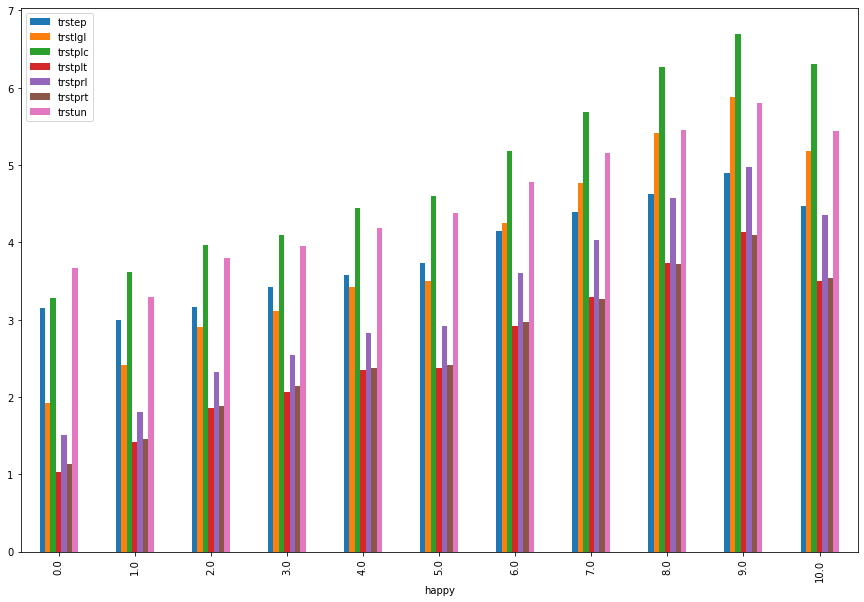

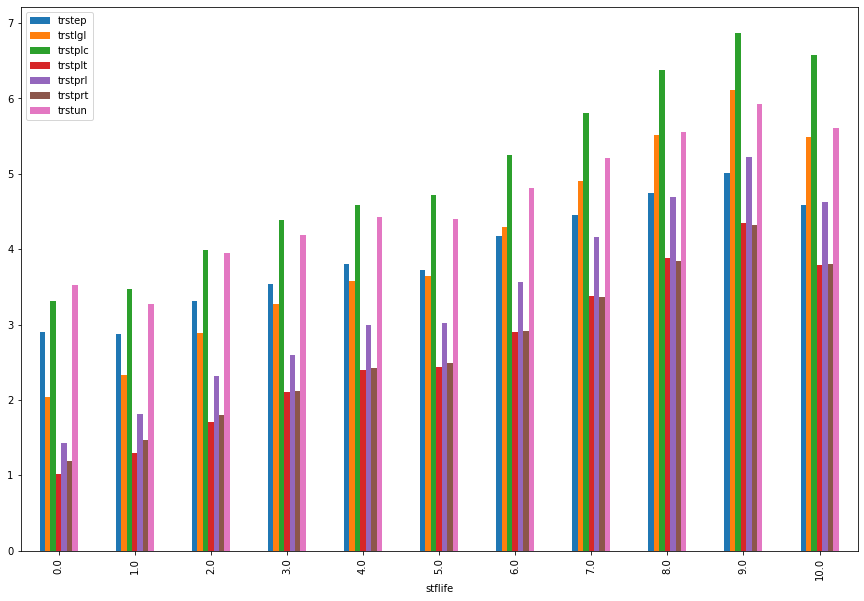

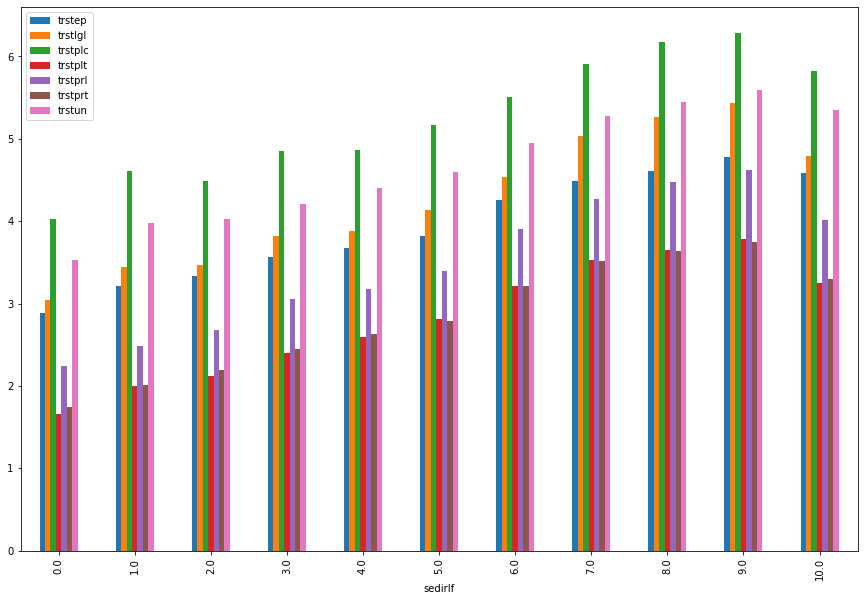

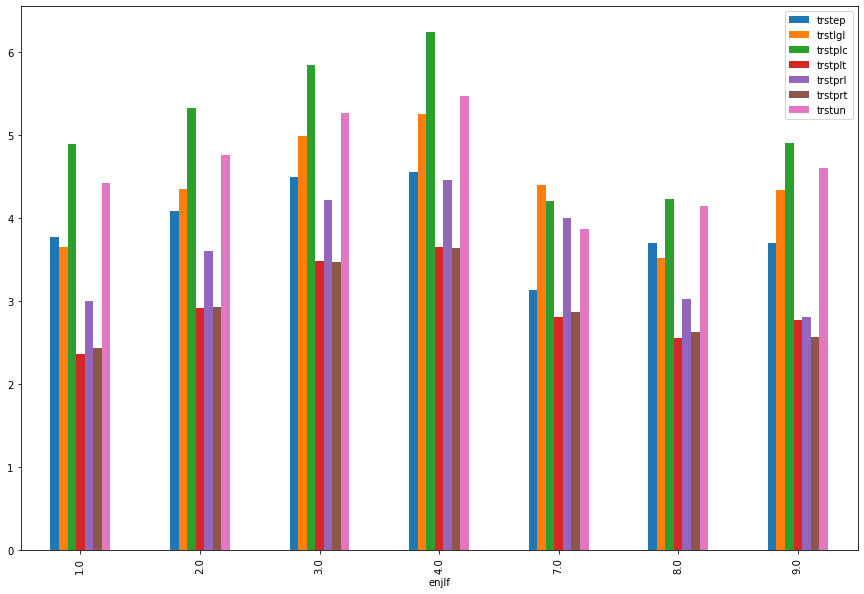

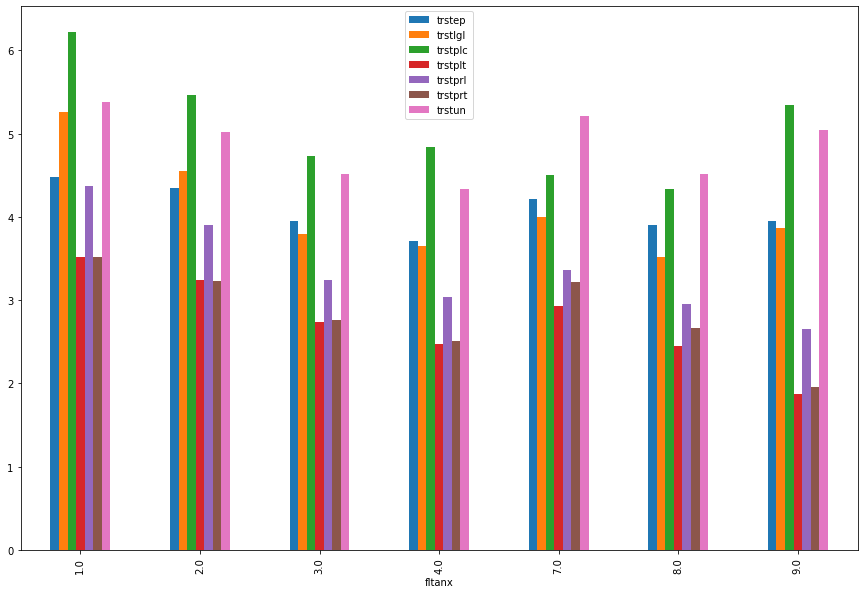

In [85]:
for well_being_col in target_well_being_cols:
    happy_trust_entity = trust_to_entity_df[[well_being_col] + trust_to_entity_cols]
    happy_mean = happy_trust_entity.groupby(well_being_col).mean()
    happy_mean.plot.bar(figsize=(15,10))
    plt.show()